# 단순 선형 회귀 실습
## 1.필요 모듈 임포트
- sklearn : Python에서 머신러닝을 위한 라이브러리.
- sklearn.linear_model : linear_model은 선형 회귀 모델을 제공

- sklearn.model_selection.train_test_split : 데이터를 학습용과 테스트용으로 무작위로 분할하는 기능을 제공
  1. 데이터를 학습용과 테스트용으로 나눠 모델의 일반화 성능을 평가할 수 있도록 지원
  2. 데이터의 비율을 지정해 학습용과 테스트용의 비율을 조정할 수 있음 (기본값은 75:25 비율)
  3. 무작위성을 제어하기 위한 random_state 파라미터 제공

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 2.데이터 생성
- np.random.seed() : 난수 생성기의 시드(seed)를 설정. 난수 생성기는 일정한 규칙에 따라 난수를 생성하는 알고리즘인데, 시드를 설정하면 그 시드 값을 기준으로 항상 동일한 난수들이 생성된다.

- X = 2 * np.random.rand(100, 1) : 0과 1 사이의 균일 분포에서 100개의 랜덤한 실수 값을 가지는 100x1 형태의 배열(2차원 배열)을 생성.



In [ ]:
np.random.seed(20)
print(np.random.rand(5))

np.random.seed(10)
print(np.random.rand(5))


[0.5881308  0.89771373 0.89153073 0.81583748 0.03588959]
[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701]


In [ ]:
# 1. 랜덤 기울기와 절편 설정
np.random.seed(10)  # 재현성을 위해 시드 설정
random_slope = np.random.uniform(1, 10)  # 1과 10 사이의 랜덤 기울기
random_intercept = np.random.uniform(0, 5)  # 0과 5 사이의 랜덤 절편

In [ ]:
# 2. 데이터 생성
X = 2 * np.random.rand(100, 1)  # 독립 변수 X (100개의 랜덤 데이터)
y = random_intercept + random_slope * X + np.random.randn(100, 1)  # 종속 변수 y (랜덤 기울기와 절편 + 노이즈)

In [ ]:
print(f"X의 차원 {X.ndim}, X의 shape {X.shape}")

X의 차원 2, X의 shape (100, 1)


## 3.학습 데이터 분할
<img src="https://www.researchgate.net/publication/366318936/figure/fig2/AS:11431281256770450@1719571645716/Data-Split-Methodology.jpg">  

- train_test_split() : 데이터셋을 분할함으로써 모델의 학습에 사용되지 않은 테스트 데이터를 통해 모델의 일반화 성능을 평가할 수 있음.


- X: 독립 변수(입력 데이터)를 의미. 예제에서는 랜덤으로 생성된 100개의 데이터.
- y: 종속 변수(타겟 데이터)를 의미. X에 대한 출력 값으로, 예제에서는 랜덤 기울기와 절편을 사용하여 생성된 값.

- test_size=0.2 : test_size는 테스트 데이터셋의 비율을 설정. test_size=0.2는 전체 데이터의 20%를 테스트용 데이터로 사용하고, 나머지 80%를 학습용 데이터로 사용하겠다는 의미.
예제에서 데이터가 100개이므로, 80개는 학습용, 20개는 테스트용으로 분할.

- random_state=10 : random_state는 데이터셋을 분할할 때의 무작위성을 제어하는 시드 값.
random_state를 설정하면, 같은 시드 값으로 train_test_split 함수를 호출할 때마다 항상 동일한 방식으로 데이터를 분할한다. 이는 실험의 재현성을 보장하는 데 중요.

X_train: 학습용 데이터의 입력 값 (독립 변수).  
X_test: 테스트용 데이터의 입력 값 (독립 변수).  
y_train: 학습용 데이터의 출력 값 (종속 변수).  
y_test: 테스트용 데이터의 출력 값 (종속 변수).  



In [ ]:
# 3. 학습용 데이터와 테스트용 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
print(f"학습용 X : {len(X_train)} , 학습용 y : {len(y_train)}")
print(f"테스트용 X : {len(X_test)} , 테스트용 y : {len(y_test)}")

학습용 X : 80 , 학습용 y : 80
테스트용 X : 20 , 테스트용 y : 20


## 4.모델 학습
- model = LinearRegression():
이 클래스는 단순 선형 회귀와 다중 선형 회귀를 포함한 선형 모델을 구현.
모델 생성 시 특별한 매개변수를 지정하지 않으면 기본값으로 생성. (예를 들어, fit_intercept=True는 절편을 포함할지 여부를 설정합니다.)

- fit() : 모델을 학습시키는 함수.
이 메서드는 주어진 학습용 데이터 X_train(독립 변수)와 y_train(종속 변수)을 사용하여 모델의 파라미터(기울기와 절편)를 추정.
모델이 데이터를 통해 학습한 기울기와 절편은 최종적으로 회귀 직선을 정의하는 데 사용.

- 학습 과정 : fit() 메서드가 호출되면, 선형 회귀 모델은 X_train과 y_train 데이터를 사용하여 최소 제곱법(Ordinary Least Squares, OLS) 알고리즘으로 학습을 진행.
    - 최소 제곱법은 잔차(residual, 실제 값과 예측 값의 차이)의 제곱합을 최소화하는 기울기와 절편을 찾는 방식.





In [ ]:
# 4. 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("기울기 (coefficients):", model.coef_)
print("절편 (intercept):", model.intercept_)

기울기 (coefficients): [[7.73931228]]
절편 (intercept): [0.23789468]


## 5.모델 예측
- predict() : 학습된 모델을 사용하여 새로운 입력 데이터에 대한 예측 값을 반환합니다. 입력 데이터가 모델의 학습 과정에서 사용된 것과 동일한 형식이어야 함.

In [ ]:
# 5. 예측
y_pred = model.predict(X_test)
print(y_pred[:5])

[[ 2.43849147]
 [11.40967427]
 [11.91880297]
 [ 9.93195832]
 [ 5.35697475]]


## 6.시각화
1. 랜덤하게 만들어진 기울기와 실제 기울기를 표시
2. 데이터 분포와 회귀식이 얼마나 일치하는지 확인

실제 기울기 (랜덤 생성): 7.94
실제 절편 (랜덤 생성): 0.10
모델이 학습한 기울기: 7.74
모델이 학습한 절편: 0.24


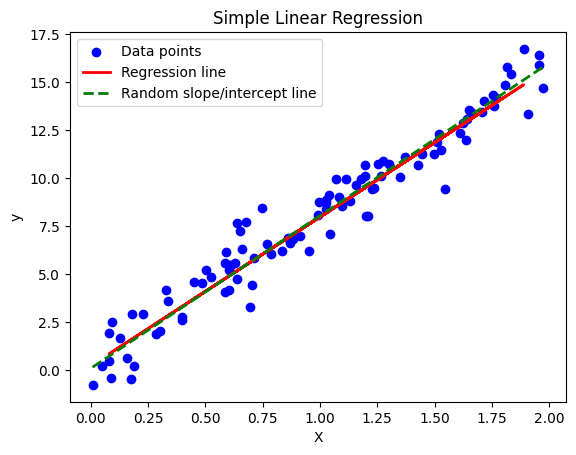

In [ ]:
# 6. 회귀 직선의 기울기와 절편
print(f"실제 기울기 (랜덤 생성): {random_slope:.2f}")
print(f"실제 절편 (랜덤 생성): {random_intercept:.2f}")
print(f"모델이 학습한 기울기: {model.coef_[0][0]:.2f}")
print(f"모델이 학습한 절편: {model.intercept_[0]:.2f}")

# 7. 시각화
plt.scatter(X, y, color='blue', label='Data points')  # 원본 데이터
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')  # 학습된 회귀 직선

# 랜덤 기울기와 절편으로 생성된 직선 (점선으로 표시)
X_range = np.linspace(X.min(), X.max(), 100)
y_random_line = random_intercept + random_slope * X_range
plt.plot(X_range, y_random_line, color='green', linestyle='--', linewidth=2, label='Random slope/intercept line')

plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## 7.모델 평가

### 1.R^2 값 확인

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.4f}")

R^2: 0.9315


### 2.ANOVA 분석
- sum_sq (Sum of Squares): 각 항목의 제곱합을 의미

  - X: 독립 변수 X의 제곱합. 값은 X 변수에 의한 설명된 변동의 크기.
  - Residual: 잔차(오차) 제곱합. 값은 모델이 설명하지 못한 변동의 크기.

- df (Degrees of Freedom): 자유도입니다.

  - X: 독립 변수 X의 자유도입니다. 단일 독립 변수의 자유도는 1.
  - Residual: 잔차의 자유도

- F (F-statistic): F 통계량입니다.

  - F 통계량이 높을수록 독립 변수가 종속 변수에 대해 유의미한 영향을 미친다고 할 수 있음.

- PR(>F) (P-value): F 통계량에 대한 p-값입니다.

  - p-값이 0.05보다 작으면 일반적으로 통계적으로 유의하다고 판단.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# 학습 데이터를 DataFrame으로 변환
data = pd.DataFrame({
    'X': X_train.flatten(),
    'y': y_train.flatten()
})

# OLS 모델 생성
model_ols = ols('y ~ X', data=data).fit()

# ANOVA 분석
anova_results = sm.stats.anova_lm(model_ols, typ=2)
print(anova_results)


               sum_sq    df            F        PR(>F)
X         1441.089172   1.0  1457.722721  3.097560e-52
Residual    77.109970  78.0          NaN           NaN
